# Outliers

In [3]:
%reset
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
Cars=pd.read_csv('carSalesPrice.csv')
Cars

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,yes,yes
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,yes,no
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,yes,no
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,no,no
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,no,no
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,yes,no
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,yes,no
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,yes,no


In [15]:
from statsmodels.formula.api import ols
model1=ols('Price~Mileage',data=(Cars))
results1=model1.fit()
print(results1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.019     
Dependent Variable: Price            AIC:                17059.6335
Date:               2023-06-26 15:56 BIC:                17069.0127
No. Observations:   804              Log-Likelihood:     -8527.8   
Df Model:           1                F-statistic:        16.75     
Df Residuals:       802              Prob (F-statistic): 4.68e-05  
R-squared:          0.020            Scale:              9.5830e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  24764.5590 904.3633 27.3834 0.0000 22989.3605 26539.7575
Mileage       -0.1725   0.0421 -4.0932 0.0000    -0.2553    -0.0898
-------------------------------------------------------------------
Omnibus:              236.450       Durbin-Watson:          0.089 

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

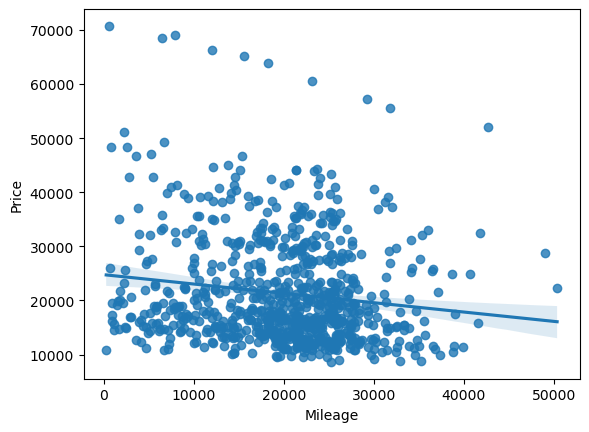

In [16]:
sns.regplot(x="Mileage",y="Price",data=Cars)

eval_env: 1


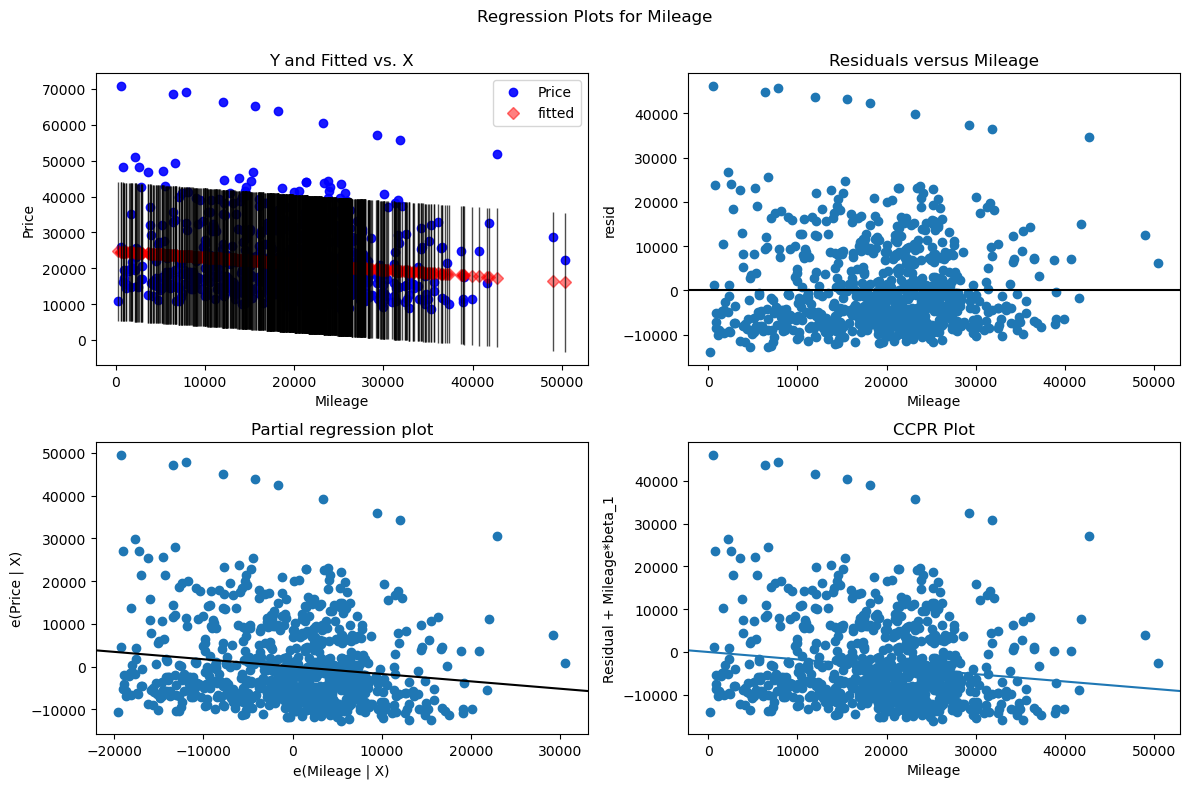

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'Mileage',fig=fig)

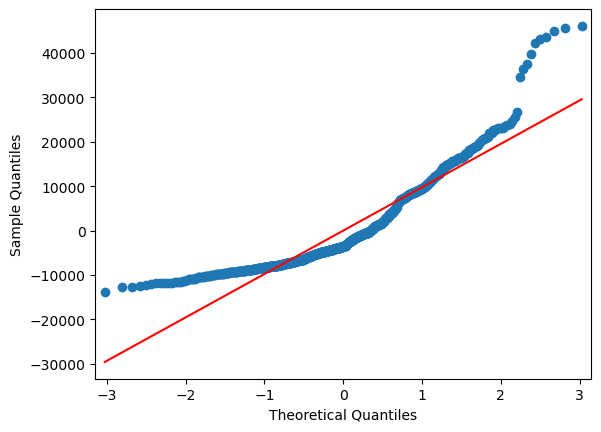

In [18]:
sm.qqplot(results1.resid,line='s')
plt.show()

In [19]:
import scipy
from scipy import stats

stats.shapiro(results1.resid)

ShapiroResult(statistic=0.8634562492370605, pvalue=7.511177935809543e-26)

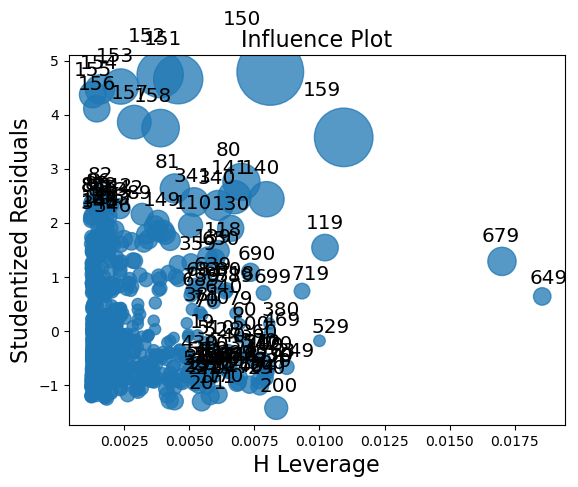

In [20]:
fig=sm.graphics.influence_plot(results1,criterion='cooks')

Review high leverage, outliers, influential points, and Cook's distance.

Studentized residual allows for unitless measure, showing how many standard deviations above or below the data point is from the regression line.  

Greater or less than about 2 should be flagged for further investigation

95% of the measurements fall within 2 standard deviations away.

The influence is shown by the criterion Cook’s distance (a measure of influence).  

In [21]:
NewCars=pd.read_csv('carSalesPrice_woCC.csv')
NewCars

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,yes,yes
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,yes,no
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,yes,no
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,no,no
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
789,16507.07027,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,no,no
790,16175.95760,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,yes,no
791,15731.13290,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,yes,no
792,15118.89323,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,yes,yes,no


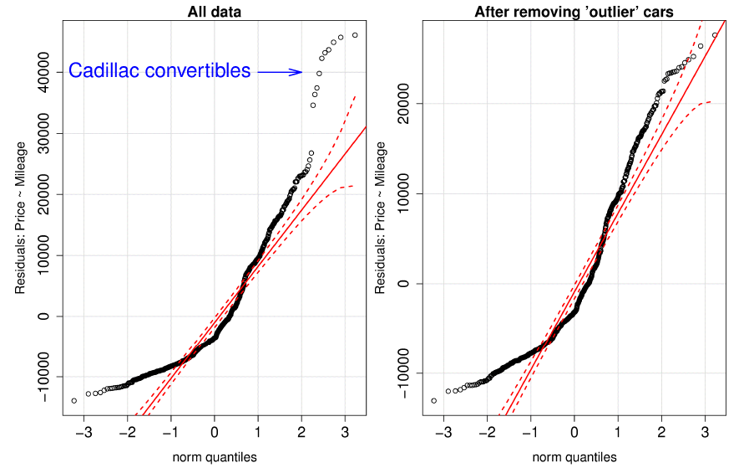

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

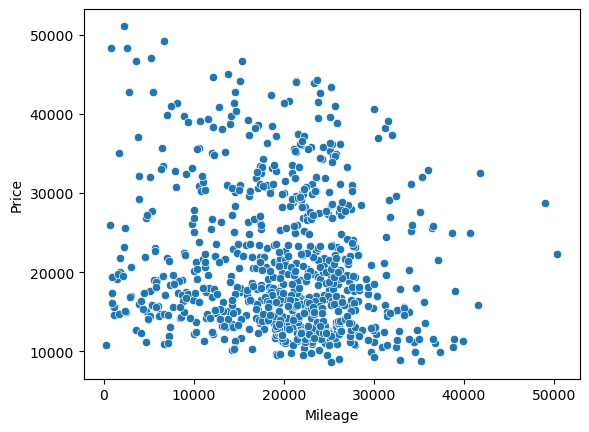

In [22]:
sns.scatterplot(x="Mileage",y="Price",data=NewCars)

In [23]:
from statsmodels.formula.api import ols
model2=ols('Price~Mileage',data=(NewCars))
results2=model2.fit()
print(results2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.020     
Dependent Variable: Price            AIC:                16651.8304
Date:               2023-06-26 15:56 BIC:                16661.1846
No. Observations:   794              Log-Likelihood:     -8323.9   
Df Model:           1                F-statistic:        16.80     
Df Residuals:       792              Prob (F-statistic): 4.59e-05  
R-squared:          0.021            Scale:              7.4902e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  23894.1855 810.7071 29.4733 0.0000 22302.7967 25485.5743
Mileage       -0.1549   0.0378 -4.0984 0.0000    -0.2292    -0.0807
-------------------------------------------------------------------
Omnibus:               97.023       Durbin-Watson:          0.084 

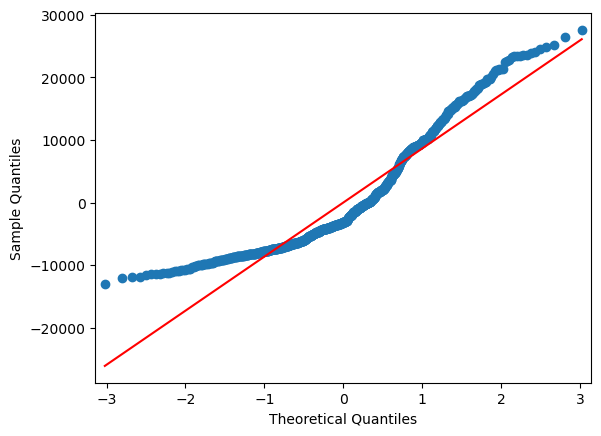

In [24]:
sm.qqplot(results2.resid,line='s')
plt.show()